In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'anime.csv'

In [3]:
data = pd.read_csv(path).drop(['name'], axis=1)

In [4]:
data.tail()

,anime_id,genre,type,episodes,rating,members
12289,9316,Hentai,OVA,1,4.15,211
12290,5543,Hentai,OVA,1,4.28,183
12291,5621,Hentai,OVA,4,4.88,219
12292,6133,Hentai,OVA,1,4.98,175
12293,26081,Hentai,Movie,1,5.46,142


In [5]:
data['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [6]:
data['episodes'] = data['episodes'].replace('Unknown', np.nan)

In [7]:
rows_na = []
for row in data.index:
    if data.iloc[row].isna().sum() != 0:
        rows_na.append(row)

In [8]:
data.isna().sum()

anime_id      0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [9]:
data = data.drop(rows_na)

In [10]:
data.reset_index(inplace=True)

In [11]:
data.tail()

,index,anime_id,genre,type,episodes,rating,members
11825,12289,9316,Hentai,OVA,1,4.15,211
11826,12290,5543,Hentai,OVA,1,4.28,183
11827,12291,5621,Hentai,OVA,4,4.88,219
11828,12292,6133,Hentai,OVA,1,4.98,175
11829,12293,26081,Hentai,Movie,1,5.46,142


In [12]:
uniq_genre = []
for val in data['genre'].unique():
    for genre in val.split(', '):
        if genre not in uniq_genre:
            uniq_genre.append(genre)

In [13]:
data[uniq_genre] = 0
data

,index,anime_id,genre,type,episodes,rating,members,Drama,Romance,School,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
0,0,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9253,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,12289,9316,Hentai,OVA,1,4.15,211,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11826,12290,5543,Hentai,OVA,1,4.28,183,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11827,12291,5621,Hentai,OVA,4,4.88,219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11828,12292,6133,Hentai,OVA,1,4.98,175,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for g in uniq_genre:
    data[g] = data.apply(lambda row: 1 if g in row['genre'] else 0, axis=1)
data

,index,anime_id,genre,type,episodes,rating,members,Drama,Romance,School,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
0,0,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9253,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,12289,9316,Hentai,OVA,1,4.15,211,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11826,12290,5543,Hentai,OVA,1,4.28,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11827,12291,5621,Hentai,OVA,4,4.88,219,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11828,12292,6133,Hentai,OVA,1,4.98,175,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data = data.drop(['genre', 'index'], axis=1)
data

,anime_id,type,episodes,rating,members,Drama,Romance,School,Supernatural,Action,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
0,32281,Movie,1,9.37,200630,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,TV,64,9.26,793665,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,TV,51,9.25,114262,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,TV,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,TV,51,9.16,151266,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,9316,OVA,1,4.15,211,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11826,5543,OVA,1,4.28,183,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11827,5621,OVA,4,4.88,219,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11828,6133,OVA,1,4.98,175,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data = data.drop('anime_id', axis=1)

In [17]:
data

,type,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,...,Shounen Ai,Game,Dementia,Harem,Cars,Kids,Shoujo Ai,Hentai,Yaoi,Yuri
0,Movie,1,9.37,200630,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TV,64,9.26,793665,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,TV,51,9.25,114262,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,TV,24,9.17,673572,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV,51,9.16,151266,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,OVA,1,4.15,211,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11826,OVA,1,4.28,183,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11827,OVA,4,4.88,219,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11828,OVA,1,4.98,175,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
data['type'].unique().sum()

'MovieTVOVASpecialMusicONA'

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
data['type'] = data['type'].fillna('Unknown')
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(), index=data.index)
data = pd.concat([data, encoded_df], axis=1)
data

,type,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,...,Shoujo Ai,Hentai,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,Movie,1,9.37,200630,1,1,1,1,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,TV,64,9.26,793665,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,TV,51,9.25,114262,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,TV,24,9.17,673572,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,TV,51,9.16,151266,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,OVA,1,4.15,211,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11826,OVA,1,4.28,183,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11827,OVA,4,4.88,219,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11828,OVA,1,4.98,175,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
data = data.drop('type', axis=1)

In [22]:
data

,episodes,rating,members,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,...,Shoujo Ai,Hentai,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,9.37,200630,1,1,1,1,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,64,9.26,793665,1,0,0,0,1,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,51,9.25,114262,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,24,9.17,673572,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,51,9.16,151266,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,1,4.15,211,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11826,1,4.28,183,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11827,4,4.88,219,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11828,1,4.98,175,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
X = data[np.delete(np.array(data.columns), 1)]
y = data['rating']
X

,episodes,members,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,...,Shoujo Ai,Hentai,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,200630,1,1,1,1,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,64,793665,1,0,0,0,1,1,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,51,114262,0,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,24,673572,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,51,151266,0,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,1,211,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11826,1,183,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11827,4,219,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
11828,1,175,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
rs = 35

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=rs)

In [27]:
X_train.head()

,episodes,members,Drama,Romance,School,Supernatural,Action,Adventure,Fantasy,Magic,...,Shoujo Ai,Hentai,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
70,1,80825,0,0,0,1,0,1,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3091,2,2447,0,0,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5646,4,1771,1,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
6795,10,582,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
7967,1,508,0,0,0,0,0,0,0,0,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
import seaborn as sns

<Axes: xlabel='episodes', ylabel='rating'>

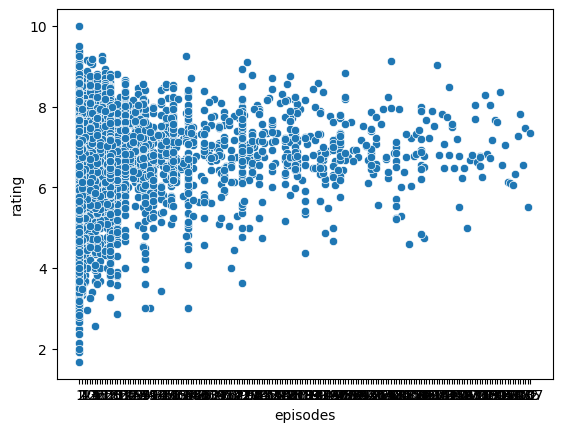

In [29]:
sns.scatterplot(x=X_train['episodes'], y=y_train)

In [30]:
X, y

(      episodes  members  Drama  Romance  School  Supernatural  Action  \
 0            1   200630      1        1       1             1       0   
 1           64   793665      1        0       0             0       1   
 2           51   114262      0        0       0             0       1   
 3           24   673572      0        0       0             0       0   
 4           51   151266      0        0       0             0       1   
 ...        ...      ...    ...      ...     ...           ...     ...   
 11825        1      211      0        0       0             0       0   
 11826        1      183      0        0       0             0       0   
 11827        4      219      0        0       0             0       0   
 11828        1      175      0        0       0             0       0   
 11829        1      142      0        0       0             0       0   
 
        Adventure  Fantasy  Magic  ...  Shoujo Ai  Hentai  Yaoi  Yuri  \
 0              0        0      0  ..

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
def get_rf_rmse(X=X_train, y=y_train, X_v=X_val, y_v=y_val, n=503, max_depth=17):
    rf_model = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=rs)
    rf_model.fit(X, y)
    predict_train = rf_model.predict(X)
    predict_val = rf_model.predict(X_v)
    rmse_train = mean_squared_error(y, predict_train)
    rmse_val = mean_squared_error(y_v, predict_val)
    print(f'RMSE на обучении: {np.sqrt(rmse_train)}, RMSE на тесте: {np.sqrt(rmse_val)}')

In [33]:
get_rf_rmse()

RMSE на обучении: 0.4151627938619404, RMSE на тесте: 0.622951097981602


In [34]:
def get_predict_rf(X=X_train, y=y_train, X_v=X_val, y_v=y_val, n=503, max_depth=17):
    rf_model = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=rs)
    rf_model.fit(X, y)
    return rf_model.predict(X_v)

In [35]:
predict = get_predict_rf()

In [36]:
predict = pd.DataFrame(predict)
y_val_indexed = y_val.copy()
y_val_indexed = y_val_indexed.reset_index().drop(['index'], axis=1)
y_val_indexed

,rating
0,4.09
1,6.90
2,6.47
3,5.82
4,6.36
...,...
1178,5.44
1179,7.55
1180,5.87
1181,6.26


In [43]:
choose = pd.concat([y_val_indexed, predict], ignore_index=True, axis=1)
choose

,0,1
0,4.09,4.356445
1,6.90,6.550927
2,6.47,5.809144
3,5.82,6.875781
4,6.36,6.669417
...,...,...
1178,5.44,5.394367
1179,7.55,6.450028
1180,5.87,5.852754
1181,6.26,7.379094


In [38]:
choose = choose.rename(columns={0: 'val', 1: 'pred'})

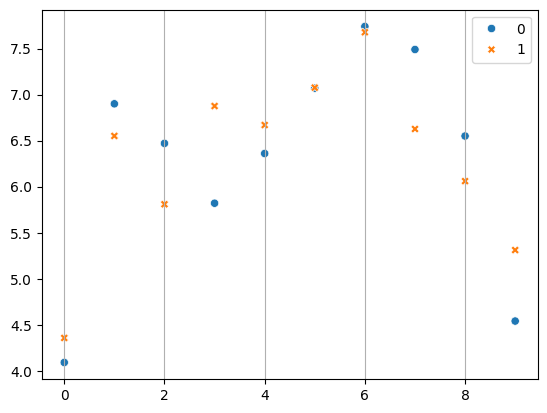

In [44]:
sns.scatterplot(choose.iloc[:10])
plt.grid(axis='x')